# Initialisation

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import collections
import requests
import operator
from tabulate import tabulate
baseURL = "http://lp-sandbox.ekstep.org:8080/taxonomy-service/v2/analytics/getContent/"
#listURL = "http://lp-sandbox.ekstep.org:8080/taxonomy-service/v2/analytics/content/list"
listURL = "http://52.77.241.169:8080/taxonomy-service/v2/analytics/content/list"
url = listURL
resp = requests.get(url).json()

# Get All Keys and Parse Them

In [4]:
#This gives the keys of any dictionary in sorted order
#It returns None value if it is not a dictionary and raises an error message
#If you wish to debug the code then pass a "verbose=true" argument
def get_keys(obj,**kwargs):
    a=False
    try:
        if(kwargs["verbose"]):
            a=True
    except KeyError:
        ;
    if(isinstance(obj,dict)):
        key_list=list(obj.keys())
        #print(key_list)
        key_list.sort()
        if(len(key_list)>0):
            return key_list
        else:
            if(a):
                print("No keys. Empty dictionary")
            return
    else:
        if(a):
            print("This is not a dictionary")
        return

In [5]:
print(get_keys(resp))

[u'id', u'params', u'responseCode', u'result', u'ts', u'ver']


In [6]:
#This gets all the keys of the object with corresponding subkeys
def get_all_keys(obj):
    x=[]
    if(isinstance(obj,dict)):
        a=get_keys(obj)
        if(a!=None):
            for i in a:
                y=[]
                x.append(i)
                b=get_all_keys(obj[i])
                if(b!=None):
                    for j in b:
                        try:
                            y.index(j)
                        except ValueError:
                            y.append(j)
                if(len(y)>0):
                    x.append(y)
    elif(isinstance(obj,list)):
        y=[]
        for i in obj:
            a=get_all_keys(i)
            if(a!=None):
                for j in a:
                    try:
                        y.index(j)
                    except ValueError:
                        y.append(j)
        if(len(y)>0):
            x=y
    if(len(x)>0):
        return x
    else:
        return            

In [7]:
#This prints the keys obtained from above in a nested fashion
def parse_keys(obj,a):
    for i in obj:
        if(isinstance(i,list)):
            b="\t"+a
            parse_keys(i,b)
        else:
            print(a,i)

In [8]:
parse_keys(get_all_keys(resp),"")

('', u'id')
('', u'params')
('\t', u'err')
('\t', u'errmsg')
('\t', u'msgid')
('\t', u'resmsgid')
('\t', u'status')
('', u'responseCode')
('', u'result')
('\t', u'contents')
('\t\t', u'ageGroup')
('\t\t', u'appIcon')
('\t\t', u'artifactUrl')
('\t\t', u'author')
('\t\t', u'code')
('\t\t', u'collaborators')
('\t\t', u'concepts')
('\t\t', u'contentType')
('\t\t', u'copyright')
('\t\t', u'createdOn')
('\t\t', u'description')
('\t\t', u'developer')
('\t\t', u'domain')
('\t\t', u'downloadUrl')
('\t\t', u'genre')
('\t\t', u'gradeLevel')
('\t\t', u'idealScreenDensity')
('\t\t', u'idealScreenSize')
('\t\t', u'identifier')
('\t\t', u'imageCredits')
('\t\t', u'language')
('\t\t', u'lastPublishedOn')
('\t\t', u'lastSubmittedOn')
('\t\t', u'lastUpdatedBy')
('\t\t', u'lastUpdatedOn')
('\t\t', u'license')
('\t\t', u'mediaType')
('\t\t', u'mimeType')
('\t\t', u'name')
('\t\t', u'optStatus')
('\t\t', u'os')
('\t\t', u'osId')
('\t\t', u'owner')
('\t\t', u'pkgVersion')
('\t\t', u'portalOwner')
('\t\t', u

In [9]:
#This parses a dictionary object
def parse_query(obj):
    if(isinstance(obj,dict)):
        for i in get_keys(obj):
            if(isinstance(obj[i],dict)):
                print("\n",i, ":",get_keys(obj[i]))
            else:
                print("\n",i,":",obj[i])

In [10]:
parse_query(resp)

('\n', u'id', ':', u'getContentList')
('\n', u'params', ':', [u'err', u'errmsg', u'msgid', u'resmsgid', u'status'])
('\n', u'responseCode', ':', u'OK')
('\n', u'result', ':', [u'contents'])
('\n', u'ts', ':', u'2016-06-28T15:46:56ZZ')
('\n', u'ver', ':', u'2.0')


# Explore The Keys in the Contents List

In [11]:
contentList = resp["result"]["contents"]
content_keys=get_all_keys(contentList)

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
import pandas as pd

### Get Number of Records in Which Fields of a Key are Not Empty 

In [13]:
#This counts the number of the items in the list which have these keywords defined
def count_values(keyword,obj):
    l=len(obj)
    x=[]
    for k in keyword:
        count_total=0
        for i in obj:
            try:
                if(isinstance(i[k],list)):
                    if(len(i[k])!=0):
                        count_total+=1
                else:
                    count_total+=1
            except KeyError:
                ;
        x.append([k,count_total/l*100])
        print(x)
    x=sorted(x, key=operator.itemgetter(1),reverse=True)
    x_key=[item[0] for item in x]
    x_percentage=[item[1] for item in x]
    pos = [10*i for i in range(len(x))]
    
    plt.barh(pos, x_percentage, align='center')
    #plt.yticks(pos, x_key,size="small")
    plt.yticks([])
    plt.show()
    print(tabulate(x, headers=['Keyword', 'Percentage'], tablefmt='orgtbl'))

[[u'ageGroup', 100]]
[[u'ageGroup', 100], [u'appIcon', 0]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0], [u'code', 100]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0], [u'code', 100], [u'collaborators', 0]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0], [u'code', 100], [u'collaborators', 0], [u'concepts', 0]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0], [u'code', 100], [u'collaborators', 0], [u'concepts', 0], [u'contentType', 100]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0], [u'code', 100], [u'collaborators', 0], [u'concepts', 0], [u'contentType', 100], [u'copyright', 100]]
[[u'ageGroup', 100], [u'appIcon', 0], [u'artifactUrl', 100], [u'author', 0], [u'code', 100], [u'collaborators', 0], [u'concep

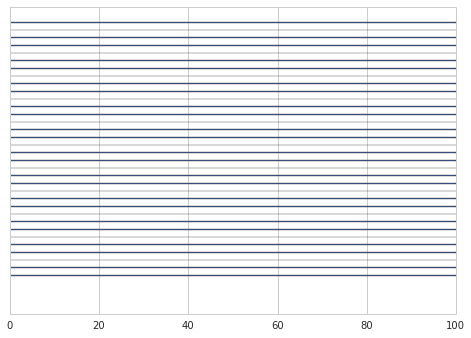

| Keyword            |   Percentage |
|--------------------+--------------|
| ageGroup           |          100 |
| artifactUrl        |          100 |
| code               |          100 |
| contentType        |          100 |
| copyright          |          100 |
| createdOn          |          100 |
| description        |          100 |
| domain             |          100 |
| downloadUrl        |          100 |
| gradeLevel         |          100 |
| idealScreenDensity |          100 |
| idealScreenSize    |          100 |
| identifier         |          100 |
| language           |          100 |
| lastPublishedOn    |          100 |
| lastSubmittedOn    |          100 |
| lastUpdatedBy      |          100 |
| lastUpdatedOn      |          100 |
| license            |          100 |
| mediaType          |          100 |
| mimeType           |          100 |
| name               |          100 |
| os                 |          100 |
| osId               |          100 |
| owner     

In [14]:
count_values(content_keys,contentList)

### Get Number of Unique Values

In [15]:
def number_of_unique_values(keywords,obj):
    r=[]
    for k in keywords:
        x=[]
        for i in obj:
            try:
                if(isinstance(i[k],list)):
                    for j in i[k]:
                        try:
                            x.index(j)
                        except ValueError:
                            x.append(j)
                else:
                    try:
                        x.index(i[k])
                    except ValueError:
                        x.append(i[k])
            except KeyError:
                ;
        r.append([k,len(x)])
    r=sorted(r, key=operator.itemgetter(1))
    r_key=[item[0] for item in r[14:40]]
    r_percentage=[item[1] for item in r[14:40]]
    pos = [10*i for i in range(len(r_key))]
    
    #percentage_list = pd.DataFrame({'Percentage' : r_percentage,
                                     #'Position' : pos})
    #sns.set_color_codes("muted")
    #sns.barplot(x = "Percentage", y = "Position", data=percentage_list, orient="h")
    plt.barh(pos, r_percentage, align='center')
    plt.yticks(pos, r_key,size="small")
    plt.show()
    print(tabulate(r, headers=['Keyword', 'Number of Unique Values'], tablefmt='orgtbl'))

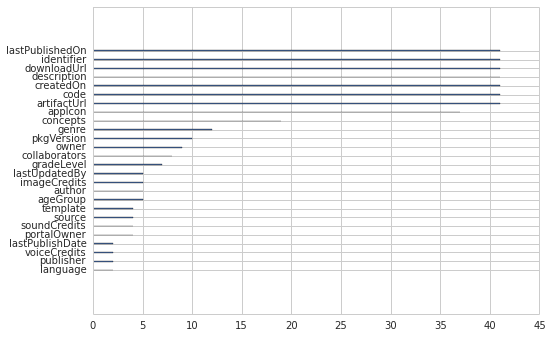

| Keyword            |   Number of Unique Values |
|--------------------+---------------------------|
| developer          |                         1 |
| idealScreenDensity |                         1 |
| idealScreenSize    |                         1 |
| license            |                         1 |
| mediaType          |                         1 |
| mimeType           |                         1 |
| optStatus          |                         1 |
| os                 |                         1 |
| osId               |                         1 |
| status             |                         1 |
| visibility         |                         1 |
| contentType        |                         2 |
| copyright          |                         2 |
| domain             |                         2 |
| language           |                         2 |
| publisher          |                         2 |
| voiceCredits       |                         2 |
| lastPublishDate    |         

In [16]:
number_of_unique_values(content_keys,contentList)

### Dividing the Keys (Basis their Values and Number of Distinct Values)

In [17]:
#Useful and Few Distinct Values
keys_useful_few=["ageGroup","contentType","gradeLevel","languageCode","language","developer","publisher","author",
        "illustrators","genre","subject","Subject","domain","popularity","filter"]
#Merge language and languageCode
#Merge subject,domain and Subject

In [18]:
#Useful But Many Distinct Values
keys_useful_many=["owner","concepts","objectsUsed","keywords","tags","description","text"]

In [19]:
#Not useful
keys_not_useful=["learningObjective","status","license","osId","visibility","activity_class","format","communication_scheme",
        "idealScreenSize","idealScreenDensity","mimeType","code","size","name","downloadUrl","identifier""lastUpdatedOn",
        "lastPublishedOn","createdOn","artifactUrl","s3Key","appIcon""template","collaborators","lastPublishDate",
        "appIconLabel","copyright","model_sample"]

In [20]:
#Not sure: Could be useful in the future
keys_possible_future_use=["portalOwner","os","source","mediaType","pkgVersion","launchUrl","soundCredits","imageCredits",
                          "voiceCredits","learnerLevel","purpose","templateType","templateName","cost"]
# learnerLevel has only two duplicate keys currently
# purpose has only three duplicate keys but may be useful in future
# merge templatename and templatetype

### Display Values of the Useful/Possibly Useful Keys

In [21]:
def list_of_values(keyword,obj):
    for k in keyword:
        x=[]
        for i in obj:
            try:
                if(isinstance(i[k],list)):
                    for j in i[k]:
                            try:
                                x.index(j.lower())
                            except ValueError:
                                x.append(j.lower())
                elif(isinstance(i[k],str)):
                    try:
                        x.index(i[k].lower())
                    except ValueError:
                        x.append(i[k].lower())
                else:
                    try:
                        x.index(i[k])
                    except ValueError:
                        x.append(i[k])
            except KeyError:
                ;
        print(k)
        parse_keys(x,"")

In [22]:
list_of_values(keys_useful_few,contentList)

ageGroup
('', u'5-6')
('', u'6-7')
('', u'7-8')
('', u'8-10')
('', u'<5')
contentType
('', u'Story')
('', u'Worksheet')
gradeLevel
('', u'kindergarten')
('', u'grade 1')
('', u'grade 2')
('', u'grade 3')
('', u'grade 4')
('', u'grade 5')
('', u'other')
languageCode
language
('', u'hindi')
('', u'english')
developer
('', u'EkStep')
publisher
('', u'')
('', u'Pratham Books')
author
('', u'Pratham')
('', u"Sanjiv Jaiswal 'Sanjay'")
('', u'Noni')
('', u'Pankaj Chaturvedi')
('', u'Vinita Krishna')
illustrators
genre
('', u'picture books')
('', u'chapter books')
('', u'flash cards')
('', u'serial books')
('', u'alphabet books')
('', u'folktales')
('', u'fiction')
('', u'non-fiction')
('', u'poems/rhymes')
('', u'plays')
('', u'comics')
('', u'words')
subject
Subject
domain
('', u'literacy')
('', u'numeracy')
popularity
filter


In [23]:
list_of_values(keys_useful_many,contentList)

owner
('', u'Pratham')
('', u"Sanjiv Jaiswal 'Sanjay'")
('', u'Noni')
('', u'Pankaj Chaturvedi')
('', u'Vinita Krishna')
('', u'Parabal Partap Singh')
('', u'Parabal Singh')
('', u'Harish S C')
('', u'EkStep')
concepts
('', u'lo44')
('', u'lo10')
('', u'lo3')
('', u'lo53')
('', u'lo46')
('', u'num:c2:sc1:mc7')
('', u'num:c2:sc1')
('', u'num:c3:sc4')
('', u'num:c3:sc9')
('', u'num:c3:sc3:mc8')
('', u'num:c3:sc1:mc18')
('', u'num:c3:sc1:mc20')
('', u'num:c3:sc3')
('', u'num:c3:sc1:mc6')
('', u'num:c3:sc1')
('', u'lo7')
('', u'lo39')
('', u'lo6')
('', u'num:c2:sc1:mc2')
objectsUsed
keywords
tags
('', u'camp - 2 (advance)')
('', u'story - 3')
('', u'camal story #11')
('', u'para')
('', u'camal')
('', u'pratham camal')
('', u'pratham')
('', u'para level')
('', u'story level')
('', u'story and para level')
('', u'story')
('', u'shehadh')
('', u'shehad')
('', u'shahd')
('', u'hindi story')
('', u'hindi stories')
('', u'hindi')
('', u'record and play')
('', u'record')
('', u'honey')
('', u'dig

In [24]:
list_of_values(keys_possible_future_use,contentList)

portalOwner
('', u'366')
('', u'EkStep')
('', u'334')
('', u'286')
os
('', u'all')
source
('', u'Pratham')
('', u'MangoReader')
('', u'EkStep')
('', u'')
mediaType
('', u'content')
pkgVersion
('', 3.0)
('', 5.0)
('', 7.0)
('', 15.0)
('', 9.0)
('', 12.0)
('', 11.0)
('', 13.0)
('', 1.0)
('', 2.0)
launchUrl
soundCredits
('', u'freesound.org - author: http://bit.ly/1uccytt')
('', u'soundbible.com - author: http://soundbible.com/1343-jump.html')
('', u'ekstep')
('', u'na')
imageCredits
('', u'ekstep')
('', u'harish s c')
('', u'na')
('', u'parabal singh')
voiceCredits
('', u'ekstep')
('', u'na')
learnerLevel
purpose
templateType
templateName
cost


In [25]:
#WIP
contentList

[{u'ageGroup': [u'5-6', u'6-7', u'7-8', u'8-10'],
  u'appIcon': u'https://ekstep-public.s3-ap-southeast-1.amazonaws.com/language_assets/slide19_1463739819227.png',
  u'artifactUrl': u'https://ekstep-public.s3-ap-southeast-1.amazonaws.com/content/1467121134411_domain_4078.zip',
  u'author': u'Pratham',
  u'code': u'org.ekstep.literacy.story.266',
  u'collaborators': [u'323', u'330', u'286'],
  u'concepts': [],
  u'contentType': u'Story',
  u'copyright': u'',
  u'createdOn': u'2016-05-20T10:23:39.165+0000',
  u'description': u'\u092d\u093e\u0932\u0942 \u0915\u094b \u091a\u094b\u091f \u0932\u0917 \u0917\u092f\u0940\u0964\u0906\u0917\u0947 \u092a\u095d\u093f\u090f \u0915\u094d\u092f\u093e \u0939\u0941\u0906\u0964 \u0915\u0939\u093e\u0928\u0940 \u0909\u0928 \u092c\u091a\u094d\u091a\u094b\u0902 \u0915\u0947 \u0932\u093f\u090f \u0939\u0948 \u091c\u094b \u0905\u092d\u0940 \u0935\u093e\u0915\u092f \u092a\u095d\u0928\u093e \u0936\u0941\u0930\u0942 \u0915\u0930 \u0930\u0939\u0947 \u0939\u0948\u09

In [26]:
contentDF = pd.DataFrame(contentList)

In [27]:
contentDF.head(2)


,ageGroup,appIcon,artifactUrl,author,code,collaborators,concepts,contentType,copyright,createdOn,...,publisher,s3Key,size,soundCredits,source,status,tags,template,visibility,voiceCredits
0,"[5-6, 6-7, 7-8, 8-10]",https://ekstep-public.s3-ap-southeast-1.amazon...,https://ekstep-public.s3-ap-southeast-1.amazon...,Pratham,org.ekstep.literacy.story.266,"[323, 330, 286]",[],Story,,2016-05-20T10:23:39.165+0000,...,,ecar_files/domain_4078_1467121141017.ecar,1681293.0,[freesound.org - author: http://bit.ly/1UccYtt...,Pratham,Live,"[Camp - 2 (Advance), Story - 3, Camal Story #1...",domain_3946,Default,[EkStep]
1,"[5-6, 6-7, 7-8, 8-10]",https://ekstep-public.s3-ap-southeast-1.amazon...,https://ekstep-public.s3-ap-southeast-1.amazon...,Pratham,org.ekstep.literacy.story.264,"[206, 141, 286]",[],Story,,2016-05-20T10:03:57.906+0000,...,,ecar_files/domain_4058_1467118045714.ecar,5465416.0,[freesound.org - author: http://bit.ly/1UccYtt...,Pratham,Live,"[Digital CAMAL, Story-4, digital camal, Camp -...",domain_3946,Default,[EkStep]


In [18]:
list(contentDF.columns.values)

[u'ageGroup',
 u'appIcon',
 u'artifactUrl',
 u'author',
 u'code',
 u'collaborators',
 u'concepts',
 u'contentType',
 u'copyright',
 u'createdOn',
 u'description',
 u'developer',
 u'domain',
 u'downloadUrl',
 u'gradeLevel',
 u'idealScreenDensity',
 u'idealScreenSize',
 u'identifier',
 u'imageCredits',
 u'language',
 u'lastPublishedOn',
 u'lastSubmittedOn',
 u'lastUpdatedBy',
 u'lastUpdatedOn',
 u'license',
 u'mediaType',
 u'mimeType',
 u'name',
 u'os',
 u'osId',
 u'owner',
 u'pkgVersion',
 u'portalOwner',
 u'publisher',
 u's3Key',
 u'size',
 u'soundCredits',
 u'source',
 u'status',
 u'tags',
 u'template',
 u'visibility',
 u'voiceCredits']

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
import numpy

In [86]:
contentDF.description[6]

u'Meet the children in the book.They are just like you! Children can read and listen to the story. This story is appropriate for children just beginning to read sentences. '

In [88]:
contentDF.description[18]

u'This worksheet contains 10 questions from the multiplication table of 2. It is for students learning multiplication tables of 2-digit numbers. For each question, feedback is provided.'

In [31]:
usefulContent =contentDF[['concepts', 'description', 'domain' , 'contentType', 'tags']]

In [32]:
usefulContent

,concepts,description,domain,contentType,tags
0,[],भालू को चोट लग गयी।आगे पढ़िए क्या हुआ। कहानी उन...,[literacy],Story,"[Camp - 2 (Advance), Story - 3, Camal Story #1..."
1,[],पढ़िए और देखिये कि कबूतर शिकारी के जाल से कैसे ...,[literacy],Story,"[Digital CAMAL, Story-4, digital camal, Camp -..."
2,[],बंदरों की टोली पोस्टर बनाने चली।आगे पढ़िए क्या ...,[literacy],Story,"[three, three minute, record, record and play,..."
3,[],इस कहानी में दो दोस्त अज्जू और गज्जू संकट में ...,[literacy],Story,"[Story - 3, Camp - 2 (Advance), ched, Camal St..."
4,[],क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,[literacy],Story,"[prathamdigitalcamal, Sports, Race, Fun, Coura..."
5,"[LO44, LO10, LO3, LO53, LO46]",आज मेरे घर में सब उलट पुलट है| पता नहीं क्यों!...,[literacy],Story,"[prathamdigitalcamal, pulat, ulat pulat, Life,..."
6,[],Meet the children in the book.They are just li...,[literacy],Story,"[prathamdigitalcamal, Friendship, Morals and v..."
7,[],One day Maaloo had to get some potatoes from h...,[literacy],Story,"[prathamdigitalcamal, Fun, Mangosense, Courage..."
8,[],एक कुत्ते को रोटी मिली। पढ़िए और देखिये की उसने...,[literacy],Story,"[Camp - 1 (Basic), Story - 5, camal story #5, ..."
9,"[Num:C2:SC1:MC7, Num:C2:SC1]",इस वर्कशीट में छूटी हुई संख्याओं के 20 सवाल है...,[numeracy],Worksheet,"[counting, number in between, numbers in betwe..."


In [23]:
descLength = []
for i in range(len(usefulContent['concepts'])):  
    length = len(usefulContent.description[i])
    descLength.append(length)
  


In [22]:
usefulContent['descLen'] = descLength

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
usefulContent.is_copy = False

In [34]:
usefulContent['DescLen'] = usefulContent['description'].map(lambda x: len(x))

In [36]:
usefulContent

,concepts,description,domain,contentType,tags,DescLen
0,[],भालू को चोट लग गयी।आगे पढ़िए क्या हुआ। कहानी उन...,[literacy],Story,"[Camp - 2 (Advance), Story - 3, Camal Story #1...",188
1,[],पढ़िए और देखिये कि कबूतर शिकारी के जाल से कैसे ...,[literacy],Story,"[Digital CAMAL, Story-4, digital camal, Camp -...",253
2,[],बंदरों की टोली पोस्टर बनाने चली।आगे पढ़िए क्या ...,[literacy],Story,"[three, three minute, record, record and play,...",249
3,[],इस कहानी में दो दोस्त अज्जू और गज्जू संकट में ...,[literacy],Story,"[Story - 3, Camp - 2 (Advance), ched, Camal St...",271
4,[],क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,[literacy],Story,"[prathamdigitalcamal, Sports, Race, Fun, Coura...",168
5,"[LO44, LO10, LO3, LO53, LO46]",आज मेरे घर में सब उलट पुलट है| पता नहीं क्यों!...,[literacy],Story,"[prathamdigitalcamal, pulat, ulat pulat, Life,...",129
6,[],Meet the children in the book.They are just li...,[literacy],Story,"[prathamdigitalcamal, Friendship, Morals and v...",170
7,[],One day Maaloo had to get some potatoes from h...,[literacy],Story,"[prathamdigitalcamal, Fun, Mangosense, Courage...",294
8,[],एक कुत्ते को रोटी मिली। पढ़िए और देखिये की उसने...,[literacy],Story,"[Camp - 1 (Basic), Story - 5, camal story #5, ...",262
9,"[Num:C2:SC1:MC7, Num:C2:SC1]",इस वर्कशीट में छूटी हुई संख्याओं के 20 सवाल है...,[numeracy],Worksheet,"[counting, number in between, numbers in betwe...",145


In [37]:

usefulContent.domain[0][0]

u'literacy'

In [38]:
usefulContent['newDomain'] = usefulContent['domain'].map(lambda x: str(x[0]))

In [44]:
lst_allConcepts = []
for i in range(len(usefulContent['concepts'])): 
    for str_con in usefulContent.concepts[i]:
        lst_allConcepts.append(str_con)

In [123]:
lst_allConcepts = list(set(lst_allConcepts))

In [124]:
lst_allConcepts

[u'Num:C3:SC9',
 u'LO10',
 u'LO53',
 u'Num:C3:SC3',
 u'Num:C3:SC1',
 u'LO39',
 u'LO46',
 u'Num:C2:SC1',
 u'LO44',
 u'Num:C3:SC1:MC6',
 u'LO3',
 u'Num:C2:SC1:MC7',
 u'LO6',
 u'Num:C3:SC4',
 u'Num:C2:SC1:MC2',
 u'Num:C3:SC1:MC20',
 u'Num:C3:SC1:MC18',
 u'Num:C3:SC3:MC8',
 u'LO7']

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


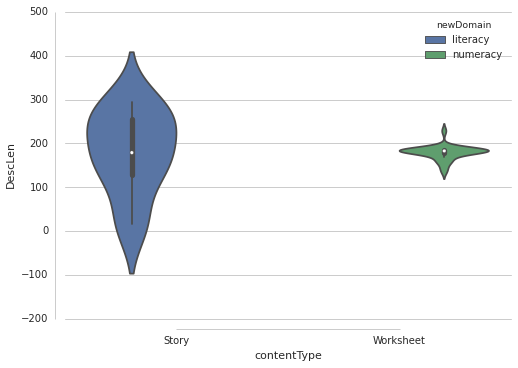

In [48]:
# grouped violinplots
sns.violinplot(x="contentType", y="DescLen", hue="newDomain", data=usefulContent)
sns.despine(offset=10, trim=True)

In [252]:
#sns.violinplot(x="contentType", y="descLen", hue="newDomain",
#              data=usefulContent ,palette="Set2",
#               split=True, scale="count")
#sns.despine(offset=10, trim=True)


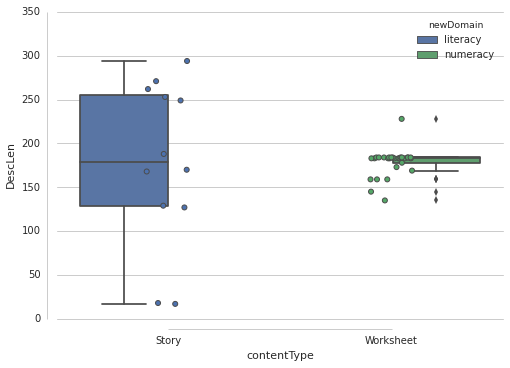

In [50]:
# grouped boxplots
sns.boxplot(x="contentType", y="DescLen", hue="newDomain", data=usefulContent)
sns.stripplot(x="contentType", y="DescLen", data=usefulContent, jitter=True, linewidth=1)
sns.despine(offset=10, trim=True)

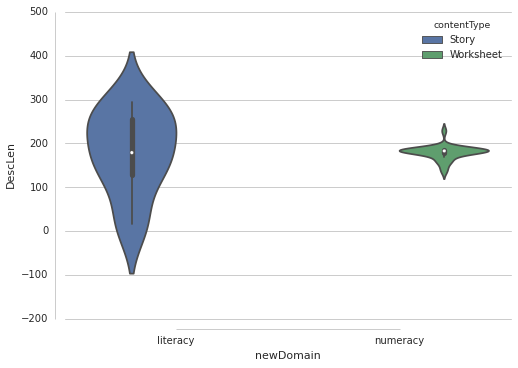

In [51]:
#inverse of previous plots
sns.violinplot(x="newDomain", y="DescLen", hue="contentType", data=usefulContent)
sns.despine(offset=10, trim=True)

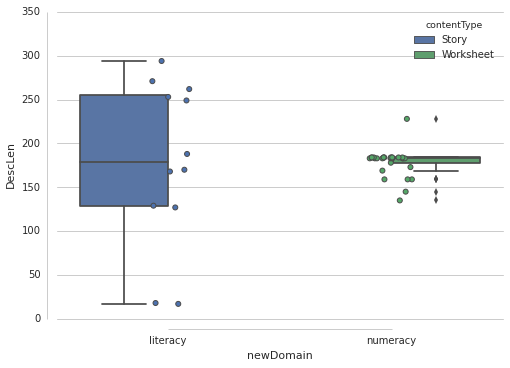

In [52]:
sns.boxplot(x="newDomain", y="DescLen", hue="contentType", data=usefulContent)
sns.stripplot(x="newDomain", y="DescLen", data=usefulContent, jitter=True, linewidth=1)
sns.despine(offset=10, trim=True)

In [53]:
def get_unique_values(column, df):
    lst_values = []
    for i in range(len(df[column])): 
        lst_values.append(df.eval(column)[i])
    lst_values = list(set(lst_values))
    return lst_values

In [54]:
lst_domain = get_unique_values('newDomain', usefulContent)

In [55]:
lst_domain

['numeracy', 'literacy']

In [56]:
lst_contentType = get_unique_values('contentType', usefulContent)

In [57]:
lst_contentType

[u'Worksheet', u'Story']

In [58]:
matrix = numpy.empty((len(lst_contentType), len(lst_domain)))
for i, content in enumerate(lst_contentType):
    for j, domain in enumerate(lst_domain):
        matrix[i][j] = sum((usefulContent['newDomain'] == domain) & (usefulContent['contentType'] == content))
        
        

In [59]:
matrix

array([[ 29.,   0.],
       [  0.,  12.]])

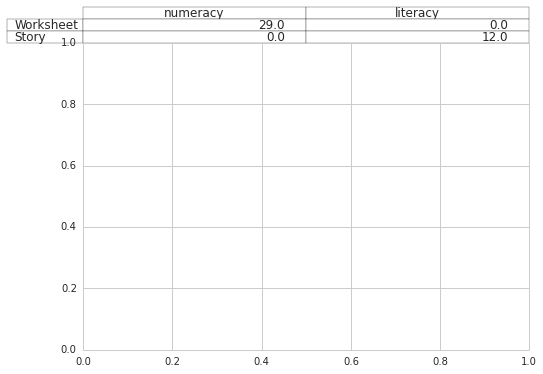

In [60]:
#remove plot
the_table = plt.table(cellText=matrix,
                      rowLabels=lst_contentType,
                      colLabels=lst_domain,
                        loc = 'top')

In [61]:
# get all the tags for literacy
def get_unique_values_for_tags(column, df, option):
    lst_values = []
    for i in range(len(df[column])): 
        if df.newDomain[i] == option:
            lst_tag = df.eval(column)[i]
            #print(lst_tag)
            [x.encode('UTF8') for x in lst_tag]
            for tag in lst_tag:
                lst_values.append(tag)
    return(lst_values)

In [62]:
lst_tags_literacy = get_unique_values_for_tags('tags', usefulContent, 'literacy')
lst_tags_numeracy = get_unique_values_for_tags('tags', usefulContent, 'numeracy')

In [63]:
len(lst_tags_numeracy)

250

In [64]:
import PIL
from wordcloud import WordCloud, STOPWORDS

In [65]:
words_literacy = ' '.join(lst_tags_literacy)
words_numeracy = ' '.join(lst_tags_numeracy)

In [66]:
def make_wordcloud(word_corpus):
    wordcloud = WordCloud(
                          
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1800,
                          height=1400
                         ).generate(word_corpus)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

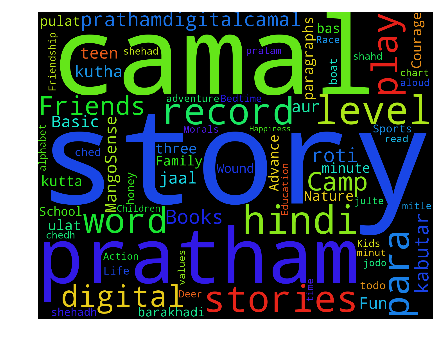

In [67]:
#literacy word cloud
make_wordcloud(words_literacy)

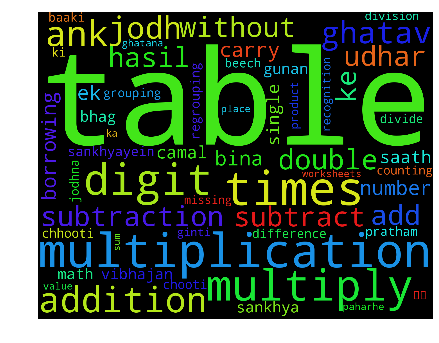

In [112]:
#numeracy word cloud
make_wordcloud(words_numeracy)

In [114]:

lst_allConcepts

[u'Num:C3:SC9',
 u'LO10',
 u'Num:C3:SC3:MC8',
 u'Num:C3:SC3',
 u'Num:C3:SC1',
 u'LO53',
 u'LO39',
 u'LO46',
 u'Num:C2:SC1',
 u'LO44',
 u'Num:C3:SC1:MC6',
 u'LO3',
 u'Num:C2:SC1:MC7',
 u'LO6',
 u'Num:C3:SC4',
 u'Num:C2:SC1:MC2',
 u'Num:C3:SC1:MC18',
 u'Num:C3:SC1:MC20',
 u'LO7']

In [118]:
CCdf = pd.DataFrame(index = range(len(usefulContent['concepts'])),columns=lst_allConcepts)
CCdf = CCdf.fillna(0)

In [119]:
len(usefulContent['concepts'])

41

In [122]:
for i in range(len(usefulContent['concepts'])): 
    for str_concepts in lst_allConcepts:
        lst_concepts = usefulContent.concepts[i]
        for n in lst_concepts:
            if n == str_concepts:
                CCdf[str_concepts][i] = 1
                


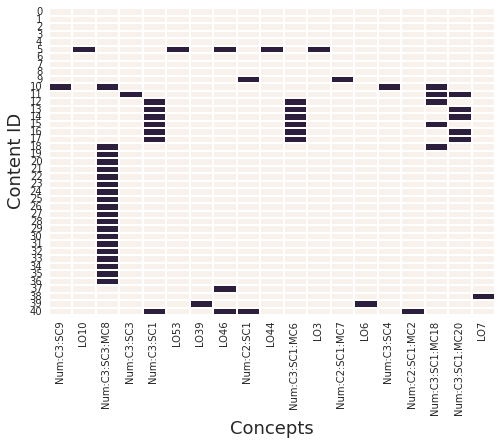

In [121]:
heatplot = sns.heatmap(CCdf ,cbar=False,linewidths=.5)
plt.ylabel('Content ID', fontsize=18)
plt.xlabel('Concepts', fontsize=18)